<a href="https://colab.research.google.com/github/Webiwo/nlp_hate_speech/blob/main/notebook/hate_speech_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Oct 22 16:42:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P0             30W /   70W |    2190MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
replace imbalanced_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imbalanced_data.csv     
replace raw_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: raw_data.csv            


In [ ]:
def fix_broken_csv(input_path: str, output_path: str) -> None:
        """
        Fixes broken lines in a CSV file (e.g., from Twitter), merges
        emoji/UTF-8 fragments, and saves the fixed file to output_path
        """

        print(f"Repairing a CSV file: {input_path}")
        fixed_lines = []
        buffer = ""

        with open(input_path, "r", encoding="utf-8", errors="replace") as f:
            for line in f:
                stripped = line.strip()

                # If the line looks like a fragment of an emoji
                # or strange UTF-8 – merge with the previous one
                if re.match(r"^[ðâ\x80\x9f]+", stripped) and buffer:
                    buffer += " " + stripped
                    continue

                # if we have content in buffer, save it as a complete record
                if buffer:
                    fixed_lines.append(buffer)
                    buffer = ""

                # the new line becomes the current buffer
                buffer = stripped

        # save last record
        if buffer:
            fixed_lines.append(buffer)

        # save new CSV file (one tweet per line)
        with open(output_path, "w", encoding="utf-8", newline="") as f:
            for line in fixed_lines:
                f.write(line + "\n")

        print(f"Repaired file saved: {output_path}")
        print(f"Records after reconstruction: {len(fixed_lines)}")

In [ ]:
import re
from pathlib import Path

input_path = "/content/imbalanced_data.csv"
fixed_path = str(Path(input_path).with_name("imbalanced_fixed.csv"))
fix_broken_csv(input_path, fixed_path)

Repairing a CSV file: /content/imbalanced_data.csv
Repaired file saved: /content/imbalanced_fixed.csv
Records after reconstruction: 31963


In [ ]:
input_path = "/content/raw_data.csv"
fixed_path = str(Path(input_path).with_name("raw_fixed.csv"))
fix_broken_csv(input_path, fixed_path)

Repairing a CSV file: /content/raw_data.csv
Repaired file saved: /content/raw_fixed.csv
Records after reconstruction: 26403


In [ ]:
import pandas as pd

In [ ]:
imbalanced_df = pd.read_csv("/content/imbalanced_fixed.csv")
imbalanced_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
imbalanced_df["label"].value_counts().sort_index()

,count
label,
0,29720
1,2242


In [ ]:
imbalanced_df[imbalanced_df["label"] == 1][:20]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


## EDA

In [ ]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

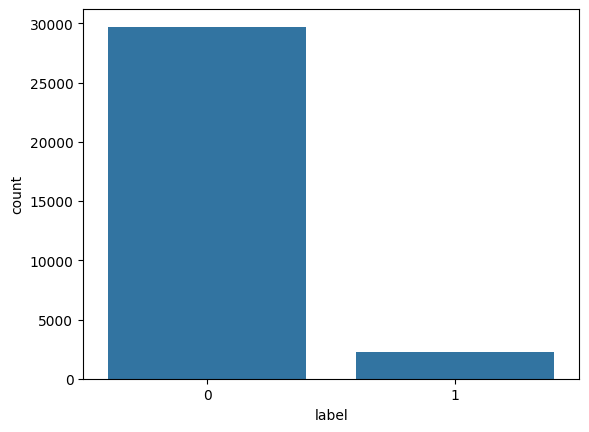

In [ ]:
sns.countplot(data=imbalanced_df, x="label")

In [ ]:
imbalanced_df.shape

(31962, 3)

In [ ]:
imbalanced_df.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
imbalanced_df.drop("id", axis=1, inplace=True)
imbalanced_df.sample(5)

,label,tweet
4194,0,late night friday featuring latest qsb by at ...
11106,0,i am thankful for coffee. #thankful #positive
24937,0,and there's something #wrong with our #generat...
21068,0,@user had a meeting today about volunteering ...
22700,0,ohhhhh ya do you all know how chuckles will li...


In [ ]:
raw_df = pd.read_csv("/content/raw_fixed.csv")
raw_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
raw_df["class"].value_counts().sort_index()

,count
class,
0,1430
1,19190
2,4163


0 - hate speech 1 - offensive language 2 - neither

In [ ]:
raw_df.drop(["Unnamed: 0", "count",	"hate_speech",	"offensive_language",	"neither"], axis=1, inplace=True)
raw_df.sample(5)

,class,tweet
21912,1,This 103 weather is a bitch
1678,1,&#8220;@_hellMEL: Men hop in they feelings muc...
7515,1,Ahmed's moms bomb pussy&gt;&gt;&gt;
8787,1,Don't blame me blame ya bitch can't help she w...
19754,2,RT @nikaaaa3: Yankees winnnn!!! &#128153;


In [ ]:
raw_df.isnull().sum()

,0
class,0
tweet,0


In [ ]:
raw_df.loc[raw_df["class"]==0, "class"]=1

In [ ]:
raw_df["class"].value_counts().sort_index()

,count
class,
1,20620
2,4163


In [ ]:
raw_df.rename(columns={"class":"label"}, inplace=True)

In [ ]:
raw_df.columns

Index(['label', 'tweet'], dtype='object')

In [ ]:
raw_df.loc[raw_df["label"]==2, "label"]=0

In [ ]:
raw_df["label"].value_counts().sort_index()

,count
label,
0,4163
1,20620


<Axes: xlabel='label', ylabel='count'>

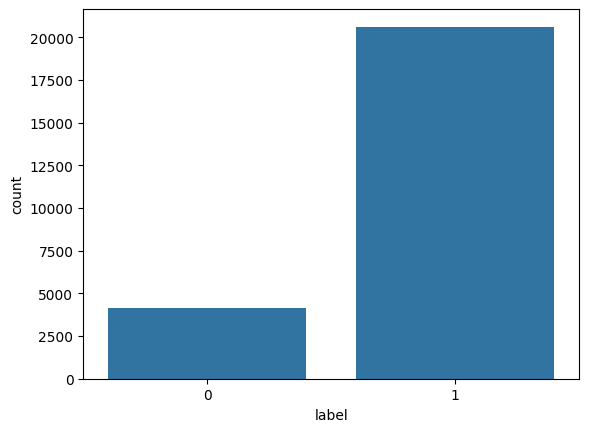

In [ ]:
sns.countplot(data=raw_df, x="label")

In [ ]:
df = pd.concat([imbalanced_df, raw_df])
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [ ]:
df["label"].value_counts()

,count
label,
0,33883
1,22862


## Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmer = nltk.SnowballStemmer("english")
stop_words = stopwords.words("english")
more_stopwords = ["u", "im", "c"]
stop_words += more_stopwords

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 12.0 MB/s eta 0:00:00


In [ ]:
import string
import emoji

def data_cleaning(words):
    words = str(words).lower()
    words = re.sub(r"\[.*?\]", "", words)
    words = re.sub(r"https?://\S+|www\.\S+", "", words)
    words = re.sub(r"<.*?>+", "", words)
    words = re.sub(r"[%s]" % re.escape(string.punctuation), "", words)
    words = re.sub(r"\n", "", words)
    words = re.sub(r"\w*\d\w*", "", words)
    words = [word for word in words.split(" ") if word not in stop_words]
    words = " ".join(words)
    words = [stemmer.stem(words) for word in words.split(" ")]
    words = " ".join(words)
    return words


In [ ]:
df["tweet"][5]

,tweet
5,[2/2] huge fan fare and big talking before the...
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [ ]:
df_idx = df.reset_index()
df_idx

,index,label,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,24779,0,"you've gone and broke the wrong heart baby, an..."
56742,24780,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,24781,1,youu got wild bitches tellin you lies


In [ ]:
df_idx["tweet"][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo'

In [ ]:
df_idx["tweet"] = df_idx["tweet"].apply(data_cleaning)

In [ ]:
df_idx["tweet"].sample(5)

,tweet
19330,cant wait long user coldplaywembley cant wa...
56469,big lips ad bitch big lips ad bitch big lips a...
50432,rt kivnaaa vivalakash god thinking lol peopl...
41656,seen planet apes brazil highest number monkey...
7237,sole âï¸ goodevening sole sun milano navig...


In [ ]:
X = df_idx["tweet"]
y = df_idx["label"]

In [ ]:
X.shape, y.shape

((56745,), (56745,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)

(45396, 45396, 11349, 11349)

In [ ]:
X_train[:20]

,tweet
33047,women sluts freshman year let hoes great ...
44206,kip tokuda yellow guy working niggerize seattl...
5260,laugh amp positips plusfactorph laugh amp ...
52825,sis said go sleep said bitch b day aint sleepi...
8952,dont wish though dont wish though dont wish ...
24896,nehabhasin madhaniya june days go staytun...
8904,latest socialmooc thanks user user user late...
2265,detroit may stronger claim red wings tv revenu...
43373,bitch come n sweats n still ya nigga checking ...
28628,wish happy sunday sunday holidays weekend w...


## Feature engineering

In [ ]:
all_words = " ".join(X).split()
unique_words = set(all_words)
len(unique_words)

67148

In [ ]:
from collections import Counter

word_counts = Counter(all_words)
print(len(word_counts))
print(word_counts.most_common(10))

67148
[('user', 191679), ('rt', 84388), ('bitch', 76598), ('like', 43366), ('love', 35142), ('amp', 33793), ('day', 30210), ('dont', 28752), ('get', 27853), ('bitches', 25682)]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
max_words = 50000
max_len = 300

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_words,
    output_mode="int",
    output_sequence_length=max_len,
)

In [ ]:
vectorize_layer.adapt(tf.data.Dataset.from_tensor_slices(X_train).batch(128))

In [310]:
X_train_vectorized = vectorize_layer(X_train)
X_test_vectorized = vectorize_layer(X_test)

In [311]:
X_train_vectorized

<tf.Tensor: shape=(45396, 300), dtype=int64, numpy=
array([[  192,  5436,  2362, ...,     0,     0,     0],
       [23065, 22186,   256, ...,     0,     0,     0],
       [  509,     7,     1, ...,     0,     0,     0],
       ...,
       [  117,  6904,   132, ...,     0,     0,     0],
       [37048,  1457,   675, ...,     0,     0,     0],
       [  352,   310,     4, ...,     0,     0,     0]])>

## Modeling

In [313]:
model = models.Sequential([
    layers.Embedding(max_words, 100),
    layers.SpatialDropout1D(0.2),              # dropout na embeddingu
    layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')
])

In [314]:
# model = tf.keras.Sequential([
#     layers.Embedding(max_words, 128),
#     layers.SpatialDropout1D(0.3),
#     layers.Bidirectional(layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation='sigmoid')
# ])

In [315]:
# model.compile(
#     loss='binary_crossentropy',
#     optimizer=tf.keras.optimizers.RMSprop(),
#     metrics=['accuracy']
# )

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_12            │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [316]:
history = model.fit(
    X_train_vectorized,
    y_train,
    batch_size=128,
    epochs=4,
    validation_split=0.2,
)

Epoch 1/4
284/284 ━━━━━━━━━━━━━━━━━━━━ 285s 992ms/step - accuracy: 0.5966 - loss: 0.6729 - val_accuracy: 0.8920 - val_loss: 0.3159
Epoch 2/4
284/284 ━━━━━━━━━━━━━━━━━━━━ 280s 987ms/step - accuracy: 0.9023 - loss: 0.2800 - val_accuracy: 0.9304 - val_loss: 0.1961
Epoch 3/4
284/284 ━━━━━━━━━━━━━━━━━━━━ 279s 981ms/step - accuracy: 0.9443 - loss: 0.1626 - val_accuracy: 0.9313 - val_loss: 0.1944
Epoch 4/4
284/284 ━━━━━━━━━━━━━━━━━━━━ 275s 968ms/step - accuracy: 0.9587 - loss: 0.1149 - val_accuracy: 0.9352 - val_loss: 0.1955


In [317]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 300, 100)       │     5,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_12            │ (None, 300, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,241,505 (58.14 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,161,004 (38.76 MB)

In [318]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test_vectorized, y_test, batch_size=128)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.9294 - loss: 0.2222
Test Loss: 0.2221
Test Accuracy: 0.9289


In [319]:
lstm_prediction = model.predict(X_test_vectorized)

355/355 ━━━━━━━━━━━━━━━━━━━━ 60s 169ms/step


In [320]:
lstm_prediction[:5]

array([[0.9863513 ],
       [0.00275408],
       [0.9508457 ],
       [0.9959208 ],
       [0.00302144]], dtype=float32)

In [321]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [322]:
from sklearn.metrics import confusion_matrix

In [323]:
print(confusion_matrix(y_test,res))

[[6440  296]
 [ 511 4102]]


In [324]:
import pickle
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(vectorize_layer, f, protocol=pickle.HIGHEST_PROTOCOL)

In [325]:
model.save("model.keras")

In [326]:
load_model=models.load_model("model.keras")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [327]:
test = "he is the devil I will vote against"
test=[data_cleaning(test)]
print(test)

['devil vot devil vot']


In [328]:
pred = load_model.predict(load_tokenizer(test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


In [329]:
pred

array([[0.9279885]], dtype=float32)

In [330]:
test = "she is so stupid"
test=[data_cleaning(test)]
print(test)

['stupid']


In [331]:
pred = load_model.predict(load_tokenizer(test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


In [332]:
pred

array([[0.36598483]], dtype=float32)

In [333]:
test = "this is a great movie i love stories like this"
test=[data_cleaning(test)]
print(test)

['great movie love stories lik great movie love stories lik great movie love stories lik great movie love stories lik great movie love stories lik']


In [334]:
pred = load_model.predict(load_tokenizer(test))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


array([[0.00313714]], dtype=float32)